<a href="https://colab.research.google.com/github/njnr14/Python-analysis-project/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/njnr14/Python-analysis-project.git

Cloning into 'Python-analysis-project'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 420.01 KiB | 6.00 MiB/s, done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path="/content/Python-analysis-project/Shipping-data.xlsx"

df=pd.read_excel(path)

print(df.head(10))

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   
5   6               F           Flight                    3                1   
6   7               D           Flight                    3                4   
7   8               F           Flight                    4                1   
8   9               A           Flight                    3                4   
9  10               B           Flight                    3                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3           

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [4]:
print(df.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

## Average weight of each shipment from each warehouse 

Warehouse_block
A    3615.448991
B    3635.701037
C    3641.331151
D    3628.846783
F    3641.387616
Name: Weight_in_gms, dtype: float64


<ipython-input-16-36aec748dd94>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axes.set_ylim(3000,3700,200)


<BarContainer object of 5 artists>

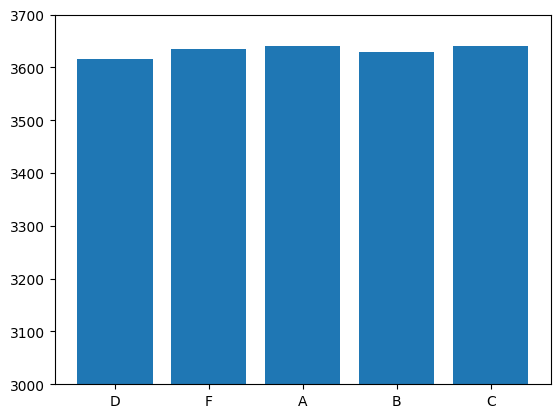

In [16]:
avr_W=df.groupby(['Warehouse_block'])['Weight_in_gms'].mean()
axes=plt.axes()
print(avr_W)
axes.set_ylim(3000,3700,200)
plt.bar(df['Warehouse_block'].unique(),avr_W)


Text(0, 0.5, 'Number of shipment')

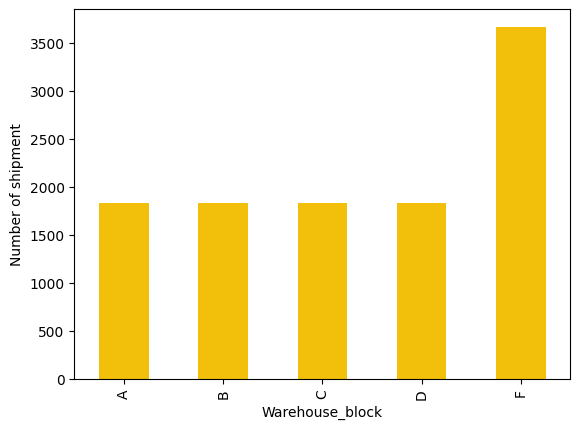

In [50]:
test=df.groupby(['Warehouse_block'])['Warehouse_block'].count()

test.plot(kind='bar',color='#f2c00a')
plt.ylabel('Number of shipment')


## pie chart showing the percentages of shipment in different mode

<Axes: ylabel='Mode_of_Shipment'>

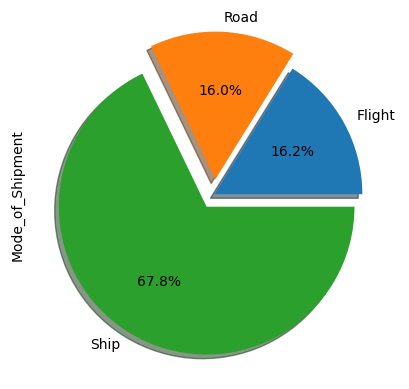

In [12]:
Shipment_mode=df.groupby(['Mode_of_Shipment'])['Mode_of_Shipment'].count()
Shipment_mode.plot(kind='pie',autopct ='%1.1f%%',shadow = True,explode =(0,0.1,0.1),startangle = 0)

#weigth v/s cost


KeyError: ignored

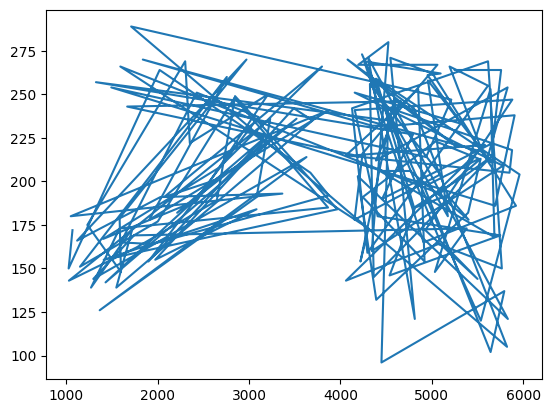

In [64]:
df_A=df[df['Warehouse_block']=='A']
df_B=df[df['Warehouse_block']=='B']
df_C=df[df['Warehouse_block']=='C']
df_D=df[df['Warehouse_block']=='D']
df_E=df[df['Warehouse_block']=='E']
df_F=df[df['Warehouse_block']=='F']  


CW_A=df_A[df_A['Mode_of_Shipment']=='Flight'].sort_values(by='Weight_in_gms')
CW_A=df_A[df_A['Product_importance']=='high']
plt.plot(CW_A['Weight_in_gms'],CW_A['Cost_of_the_Product'])